# Drawing  Conclusions

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In [1]:
# import necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# load datasets
df_2010 = pd.read_csv('data/data_2010_v2.csv')
df_2020 = pd.read_csv('data/data_2020_v2.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [3]:
# value counts of fuels for year 2010
df_2010.fuel.value_counts()

Gasoline    1600
Ethanol      105
Gas          103
Diesel         8
CNG            2
Name: fuel, dtype: int64

In [4]:
# value count of fuel for year 2020
df_2020.fuel.value_counts()

Gasoline       1179
Electricity      44
Ethanol          24
Gas              24
Diesel           20
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2010 are Ethanol and Gas, and those in 2020 are Gasoline and Electricity.

In [5]:
# how many unique models used alternative sources of fuel in 2010
alt_2010 = df_2010.query('fuel in ["Ethanol", "Gas"]').model.nunique()
alt_2010

48

In [6]:
# how many unique models used alternative sources of fuel in 2018
alt_2020 = df_2020.query('fuel in ["Gasoline", "Electricity"]').model.nunique()
alt_2020

653

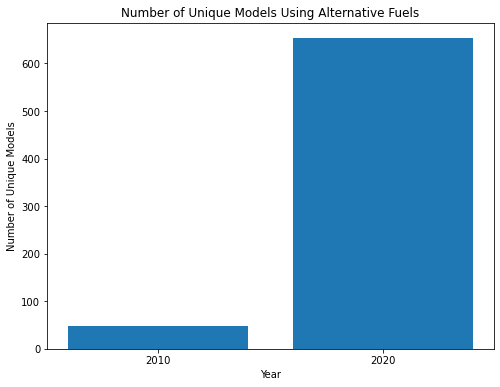

In [7]:
# bar plot
plt.subplots(figsize=(8, 6))
plt.bar(["2010", "2020"], [alt_2010, alt_2020])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

### Since 2010, the number of unique models using alternative sources of fuel increased by 605 and that is a huge number (more than 1000%) which shows how far we have came and we are on the right path. We can easiely visualise the proportions in the bar plot.

In [8]:
# total unique models each year
total_2010 = df_2010.model.nunique()
total_2020 = df_2020.model.nunique()
total_2010, total_2020

(472, 658)

In [9]:
prop_2010 = alt_2010/total_2010
prop_2020 = alt_2020/total_2020
prop_2010, prop_2020

(0.1016949152542373, 0.9924012158054711)

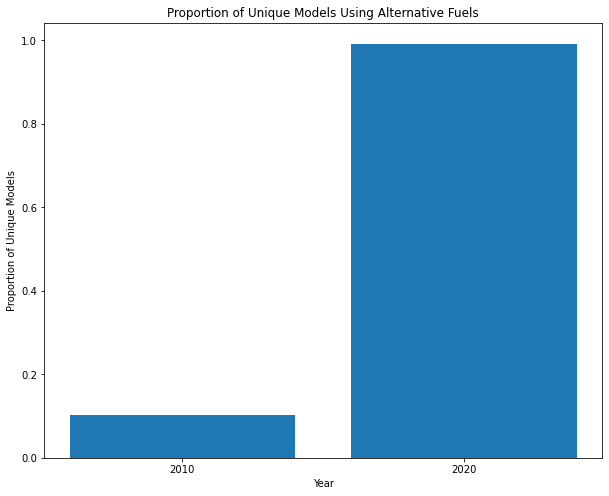

In [10]:
plt.subplots(figsize=(10, 8))
plt.bar(["2010", "2020"], [prop_2010, prop_2020])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### We can clearly see that 10% of the vehicles manufactured in 2010 used alternative fuel, but when we transition over to year 2020 its over 99% which proves that the environment and non-renuable resources are taken into considerarion, also the alternative fuel for 2020 is electricity which has zero emmision plus renuable resource.

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [11]:
# average mileage - miles per gallon of different segment vehicles in 2010
veh_2010 = df_2010.groupby('veh_class').cmb_mpg.mean()
veh_2010

veh_class
SUV                19.236220
large car          18.743363
midsize car        22.485356
minivan            18.354839
pickup             16.111111
small car          22.721417
special purpose    23.000000
station wagon      23.823077
van                12.863636
Name: cmb_mpg, dtype: float64

In [12]:
# average mileage - miles per gallon of different segment vehicles in 2020
veh_2020 = df_2020.groupby('veh_class').cmb_mpg.mean()
veh_2020

veh_class
large car          25.833333
midsize car        30.968421
minivan            28.888889
pickup             18.783333
small SUV          26.008000
small car          25.143631
special purpose    20.360000
standard SUV       19.791139
station wagon      30.826087
van                14.250000
Name: cmb_mpg, dtype: float64

Since 2020 has two sub division of class SUV , whereas 2010 has only one. Therefor we will combine both "small SUV" and "standard SUV" into a single column "SUV" for clear analysis.

In [13]:
# combine and create new column
veh_2020["SUV"] = (veh_2020["small SUV"] + veh_2020["standard SUV"])/2

In [14]:
# remove the sub division columns for SUV
veh_2020.drop(["small SUV","standard SUV"], axis = 0, inplace=True)

In [15]:
# mileage increased for each vehicle class
increased = veh_2020 - veh_2010
increased

veh_class
SUV                 3.663349
large car           7.089971
midsize car         8.483065
minivan            10.534050
pickup              2.672222
small car           2.422214
special purpose    -2.640000
station wagon       7.003010
van                 1.386364
Name: cmb_mpg, dtype: float64

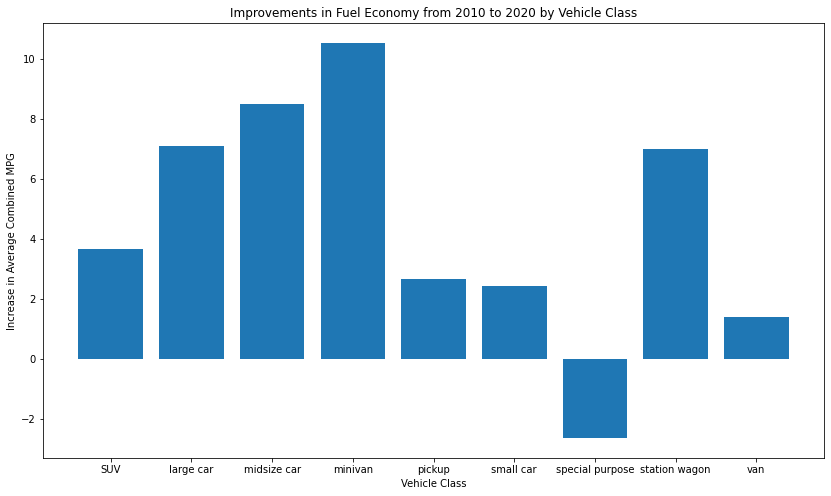

In [16]:
# only plot the classes that exist in both years
plt.subplots(figsize=(14, 8))
plt.bar(increased.index, increased)
plt.title('Improvements in Fuel Economy from 2010 to 2020 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [17]:
# smartway labels for 2010
df_2010.smartway.unique()

array(['no', 'yes'], dtype=object)

In [18]:
# smartway vehicles in 2010
smart_2010 = df_2010[df_2010['smartway'] == "yes"]

In [19]:
# analyse smart vehicles in 2010
smart_2010.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,2.300000,4.332293,7.088924,22.951638,30.369735,25.716069,7.124805
std,0.486088,0.700693,1.041282,4.434154,3.725204,3.939845,0.856971
min,1.000000,3.000000,6.000000,13.000000,19.000000,16.000000,5.000000
25%,2.000000,4.000000,6.000000,21.000000,28.000000,24.000000,7.000000
50%,2.400000,4.000000,7.000000,22.000000,30.000000,25.000000,7.000000
75%,2.500000,4.000000,7.000000,24.000000,32.000000,28.000000,8.000000
max,3.700000,6.000000,9.000000,51.000000,48.000000,50.000000,10.000000


In [20]:
# smartway labels for 2020
df_2020.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [21]:
# smartway vehicles in 2020
smart_yes_2020 = df_2020[df_2020['smartway'] == "Yes"]
smart_elite_2020 = df_2020[df_2020['smartway'] == "Elite"]

In [22]:
# analyse smart vehicles in 2020 - yes
smart_yes_2020.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.001408,4.084507,6.288732,31.788732,37.718310,34.140845,7.619718
std,0.464023,0.577264,0.871788,9.477731,7.427538,8.362862,0.864857
min,1.200000,3.000000,5.000000,18.000000,21.000000,19.000000,7.000000
25%,1.600000,4.000000,5.000000,27.000000,35.000000,30.000000,7.000000
50%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
75%,2.375000,4.000000,7.000000,32.000000,40.000000,35.000000,8.000000
max,3.500000,6.000000,7.000000,99.000000,80.000000,90.000000,10.000000


In [23]:
# analyse smart vehicles in 2020 - elite
smart_elite_2020.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,1.867797,3.898305,7.033898,59.389831,56.745763,58.067797,10.0
std,0.524385,0.661631,0.182521,29.638638,24.467144,27.042026,0.0
min,0.600000,2.000000,7.000000,23.000000,25.000000,25.000000,10.0
25%,1.600000,4.000000,7.000000,41.000000,39.000000,41.000000,10.0
50%,2.000000,4.000000,7.000000,53.000000,52.000000,52.000000,10.0
75%,2.000000,4.000000,7.000000,70.000000,68.500000,69.000000,10.0
max,3.600000,6.000000,8.000000,145.000000,121.000000,133.000000,10.0


### Q4: Do smart vehicles contain more unique models using alternative sources of fuel? By how much?

In [24]:
# value counts of fuels for year 2010
smart_2010.fuel.value_counts()

Gasoline    597
Gas          21
Ethanol      21
CNG           2
Name: fuel, dtype: int64

In [25]:
# value counts of fuels for year 2020
smart_yes_2020.fuel.value_counts()

Gasoline       132
Electricity     10
Name: fuel, dtype: int64

In [26]:
# value counts of fuels for year 2020
smart_elite_2020.fuel.value_counts()

Gasoline       37
Electricity    22
Name: fuel, dtype: int64

In [27]:
# how many unique models used alternative sources of fuel in 2010 -- smart vehicles
smart_alt_2010 = smart_2010.query('fuel in ["Ethanol", "Gas"]').model.nunique()
smart_alt_2010

11

In [28]:
# how many unique models used alternative sources of fuel in 2020 -- smart vehicles
smart_alt_2020 = smart_yes_2020.query('fuel in ["Gasoline", "Electricity"]').model.nunique()
smart_alt_2020

83

In [29]:
# how many unique models used alternative sources of fuel in 2020 -- smart vehicles
elite_alt_2020 = smart_elite_2020.query('fuel in ["Gasoline", "Electricity"]').model.nunique()
elite_alt_2020

35

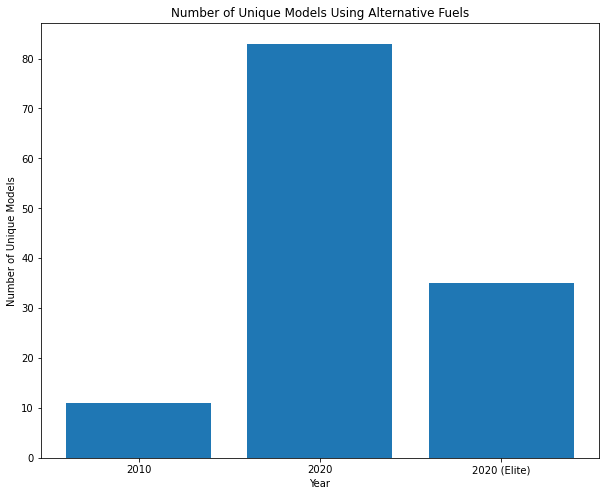

In [30]:
# bar plot
plt.subplots(figsize=(10, 8))
plt.bar(["2010", "2020", "2020 (Elite)"], [smart_alt_2010, smart_alt_2020, elite_alt_2020])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

### Since 2010, the number of unique models using alternative sources of fuel increased by 70 plus 35 in elite in smart vehicle category. 

In [31]:
# total unique models each year
smart_total_2010 = smart_2010.model.nunique()
smart_total_2020 = smart_yes_2020.model.nunique()
elite_total_2020 = smart_elite_2020.model.nunique()
smart_total_2010, smart_total_2020, elite_total_2020

(178, 83, 35)

In [32]:
# proportion of alternate fuel option vehicle count vs total vehicle
smart_prop_2010 = smart_alt_2010/smart_total_2010
smart_prop_2020 = smart_alt_2020/smart_total_2020
elite_prop_2020 = elite_alt_2020/elite_total_2020

smart_prop_2010, smart_prop_2020, elite_prop_2020

(0.06179775280898876, 1.0, 1.0)

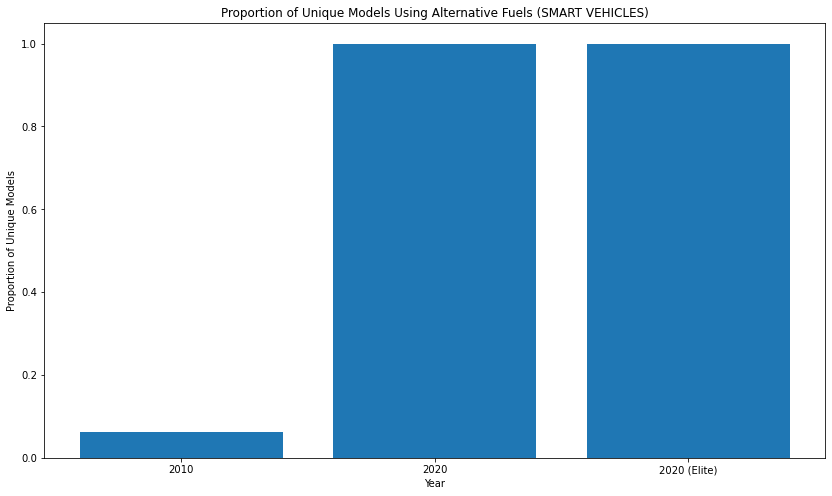

In [33]:
# bar plot
plt.subplots(figsize=(14, 8))
plt.bar(["2010", "2020", "2020 (Elite)"], [smart_prop_2010, smart_prop_2020, elite_prop_2020])
plt.title("Proportion of Unique Models Using Alternative Fuels (SMART VEHICLES)")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### We can clearly see that around 6% of the smart vehicles manufactured in 2010 used alternative fuel, but when we transition over to year 2020 100%  of the smart vehicles uses alternative fuels.

### Q5: How much have vehicle classes improved in fuel economy for smart vehicles ?  

Let's look at the average fuel economy for each vehicle class (smart vehicles) for both years.

In [34]:
# average mileage - miles per gallon of different segment vehicles in 2010 - smart vehicles
smart_veh_2010 = smart_2010.groupby('veh_class').cmb_mpg.mean()
smart_veh_2010

veh_class
SUV                24.065041
large car          23.666667
midsize car        26.314286
minivan            24.000000
pickup             24.000000
small car          26.453947
special purpose    23.000000
station wagon      25.264368
Name: cmb_mpg, dtype: float64

In [35]:
# average mileage - miles per gallon of different segment vehicles in 2010 - smart vehicles
smart_veh_2020 = smart_yes_2020.groupby('veh_class').cmb_mpg.mean()
smart_veh_2020

veh_class
large car        33.352941
midsize car      34.102564
small SUV        37.681818
small car        33.318182
standard SUV     33.444444
station wagon    32.272727
Name: cmb_mpg, dtype: float64

In [36]:
# average mileage - miles per gallon of different segment vehicles in 2020 - smart vehicles -- elite
elite_veh_2020 = smart_elite_2020.groupby('veh_class').cmb_mpg.mean()
elite_veh_2020

veh_class
large car        52.000000
midsize car      66.047619
minivan          56.000000
small SUV        54.100000
small car        53.461538
standard SUV     41.000000
station wagon    58.166667
Name: cmb_mpg, dtype: float64

Since 2020 has two sub division of class SUV , whereas 2010 has only one. Therefor we will combine both "small SUV" and "standard SUV" into a single column "SUV" for clear analysis.

In [37]:
# combine and create new column
smart_veh_2020["SUV"] = (smart_veh_2020["small SUV"] + smart_veh_2020["standard SUV"])/2
elite_veh_2020["SUV"] = (elite_veh_2020["small SUV"] + elite_veh_2020["standard SUV"])/2

In [38]:
# remove the sub division columns for SUV
smart_veh_2020.drop(["small SUV","standard SUV"], axis = 0, inplace=True)
elite_veh_2020.drop(["small SUV","standard SUV"], axis = 0, inplace=True)

In [39]:
# mileage increased for each vehicle class - smart -yes
increased_smart = smart_veh_2020 - smart_veh_2010
increased_smart

veh_class
SUV                11.498091
large car           9.686275
midsize car         7.788278
minivan                  NaN
pickup                   NaN
small car           6.864234
special purpose          NaN
station wagon       7.008359
Name: cmb_mpg, dtype: float64

In [40]:
# mileage increased for each vehicle class --- elite vehicle 2020 minus smart vehicle 2010
increased_smeli = elite_veh_2020 - smart_veh_2010
increased_smeli

veh_class
SUV                23.484959
large car          28.333333
midsize car        39.733333
minivan            32.000000
pickup                   NaN
small car          27.007591
special purpose          NaN
station wagon      32.902299
Name: cmb_mpg, dtype: float64

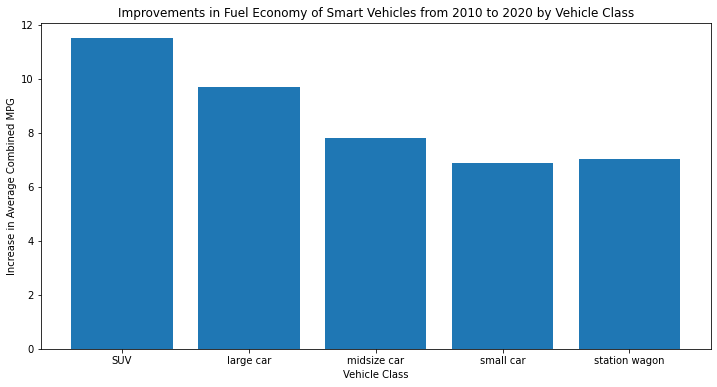

In [41]:
# plot the classes that exist in both years
increased_smart.dropna(inplace=True)
plt.subplots(figsize=(12, 6))
plt.bar(increased_smart.index, increased_smart)
plt.title('Improvements in Fuel Economy of Smart Vehicles from 2010 to 2020 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

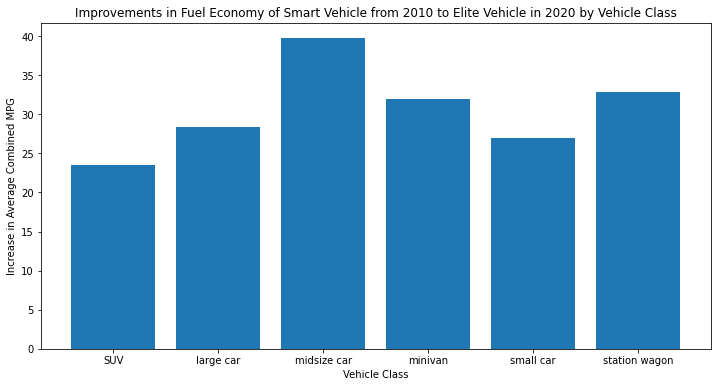

In [42]:
# plot the classes that exist in both years
increased_smeli.dropna(inplace=True)
plt.subplots(figsize=(12, 6))
plt.bar(increased_smeli.index, increased_smeli)
plt.title('Improvements in Fuel Economy of Smart Vehicle from 2010 to Elite Vehicle in 2020 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q6: What features are associated with better fuel economy?

We can explore trends between cmb_mpg and the other features in this dataset.

In [43]:
# combined mileage greater than the mean 
top_2010 = df_2010.query('cmb_mpg > cmb_mpg.mean()')
top_2010.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,2.528973,4.650811,6.811892,21.782703,29.224865,24.550270,6.575135
std,0.687035,0.959241,1.056453,4.084248,3.592505,3.686719,1.108814
min,1.000000,3.000000,3.000000,17.000000,22.000000,21.000000,4.000000
25%,2.000000,4.000000,6.000000,19.000000,27.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,21.000000,29.000000,24.000000,7.000000
75%,3.000000,6.000000,7.000000,23.000000,31.000000,26.000000,7.000000
max,6.000000,8.000000,9.000000,51.000000,48.000000,50.000000,10.000000


In [44]:
# combined mileage greater than the mean 
top_2020 = df_2020.query('cmb_mpg > cmb_mpg.mean()')
top_2020.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,2.021277,4.108747,5.732861,32.895981,38.536643,35.042553,7.040189
std,0.525890,0.717086,1.562909,17.221957,13.395831,15.448066,1.636605
min,0.600000,2.000000,1.000000,22.000000,25.000000,26.000000,5.000000
25%,1.600000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
50%,2.000000,4.000000,6.000000,27.000000,34.000000,30.000000,7.000000
75%,2.000000,4.000000,7.000000,31.000000,39.000000,34.000000,8.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


* __We can see that better performing vehicles in terms of mileage have engine displacement of around 2 - 2.5 (litres), a mean of engine cylinder 4, average air pollution score of 6 (on a scale of 10 | more the better) and a mean greenhouse score of 7 (on a scale of 10 | more the better).__ 